<a href="https://colab.research.google.com/github/ACCMouli/chandu/blob/main/wordembeddings/Word2Vec_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim

In [2]:
#Importing dependencies
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
#!pip install gensim
#!pip install google.cloud
#import gzip
import gensim
import logging

# Bag of Words

## Sample Data

In [3]:
corpus = ['king is a strong man','queen is a wise woman','boy is a young man',
          'girl is a young woman','prince is a young','prince will be strong',
          'princess is young','man is strong','woman is pretty', 'prince is a boy',
          'prince will be king', 'princess is a girl', 'princess will be queen']
print(corpus)

['king is a strong man', 'queen is a wise woman', 'boy is a young man', 'girl is a young woman', 'prince is a young', 'prince will be strong', 'princess is young', 'man is strong', 'woman is pretty', 'prince is a boy', 'prince will be king', 'princess is a girl', 'princess will be queen']


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
DTM = cv.fit_transform(corpus)
DTM = pd.DataFrame(DTM.toarray(), columns=cv.get_feature_names_out())
DTM

,be,boy,girl,is,king,man,pretty,prince,princess,queen,strong,will,wise,woman,young
0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
6,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
7,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
8,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
9,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


## DTM on Review Data

In [5]:
data = {'review': ['I loved this movie!', 'It was okay.', 'I hated it.', 'It was amazing!', 'I was disappointed.',
                   'It was a great experience.', 'I fell asleep during the movie.', 'It was a total waste of time.',
                   'I highly recommend this movie.', 'I would not recommend this movie.'],
       'sentiment': ['positive', 'neutral', 'negative', 'positive', 'negative',
                      'positive', 'negative', 'negative', 'positive', 'negative']}
df = pd.DataFrame(data)
df

,review,sentiment
0,I loved this movie!,positive
1,It was okay.,neutral
2,I hated it.,negative
3,It was amazing!,positive
4,I was disappointed.,negative
5,It was a great experience.,positive
6,I fell asleep during the movie.,negative
7,It was a total waste of time.,negative
8,I highly recommend this movie.,positive
9,I would not recommend this movie.,negative


In [6]:
# Convert the input data into a DTM
cv = CountVectorizer()
dtm = cv.fit_transform(df['review'])
dtm = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm["y_value"]=df["sentiment"]
# Print the DTM
dtm

,amazing,asleep,disappointed,during,experience,fell,great,hated,highly,it,...,okay,recommend,the,this,time,total,was,waste,would,y_value
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,positive
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,neutral
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,negative
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,positive
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative
5,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,positive
6,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,0,negative
8,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,positive
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,negative


# Word Embeddings

In [7]:
statements = [
"Trees tall",
"Trees green",
"Trees majestic",
"Trees essential",
"Trees diverse",
"Trees oxygen-giving",
"computers fast",
"computers smart",
"computers useful",
"computers powerful",
"computers everywhere",
"computers changing"
]

In [8]:
statements_list = []
for statement in statements:
  statements_list.append(statement.split())
print(statements_list)
from gensim.parsing.preprocessing import STOPWORDS
documents = [[word for word in document if word not in STOPWORDS] for document in statements_list]

[['Trees', 'tall'], ['Trees', 'green'], ['Trees', 'majestic'], ['Trees', 'essential'], ['Trees', 'diverse'], ['Trees', 'oxygen-giving'], ['computers', 'fast'], ['computers', 'smart'], ['computers', 'useful'], ['computers', 'powerful'], ['computers', 'everywhere'], ['computers', 'changing']]


In [9]:
from gensim.models import Word2Vec
model = Word2Vec(documents, min_count=1, vector_size=3, window = 3)
#size： size of word vector, hidden layer
#min-count：discard words that appear less than # times
#window：Context Window size

## Hyperparameters

### size
The hidden nodes size. The size of the dense vector to represent each token or word. If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes.

### window
Context window size. The maximum distance between the target word and its neighboring word. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter too much, as long as its a decent sized window.

### min_count
Minimium frequency count of words. The model would ignore words that do not statisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

## Checking the word2vec output

In [10]:
for word, vector in zip(model.wv.index_to_key, model.wv.vectors):
  print(word, vector)

computers [-0.01787424  0.00788105  0.17011166]
Trees [ 0.3003091  -0.31009832 -0.23722696]
useful [ 0.21529575  0.2990996  -0.16718094]
powerful [-0.12544572  0.24601682 -0.05111571]
changing [-0.15122044  0.21846838 -0.16200535]
fast [-0.06053392  0.09588599  0.03306246]
smart [-0.27617383 -0.3149606   0.24372554]
diverse [0.16900873 0.22525644 0.02542885]
oxygen-giving [ 0.21169634 -0.1135122  -0.03154671]
essential [ 0.19228578 -0.25072125 -0.13120346]
majestic [-0.2503861  -0.03100141  0.31793728]
green [-0.24397223 -0.07779229 -0.06459137]
tall [ 0.2692479  -0.19769652  0.00150541]


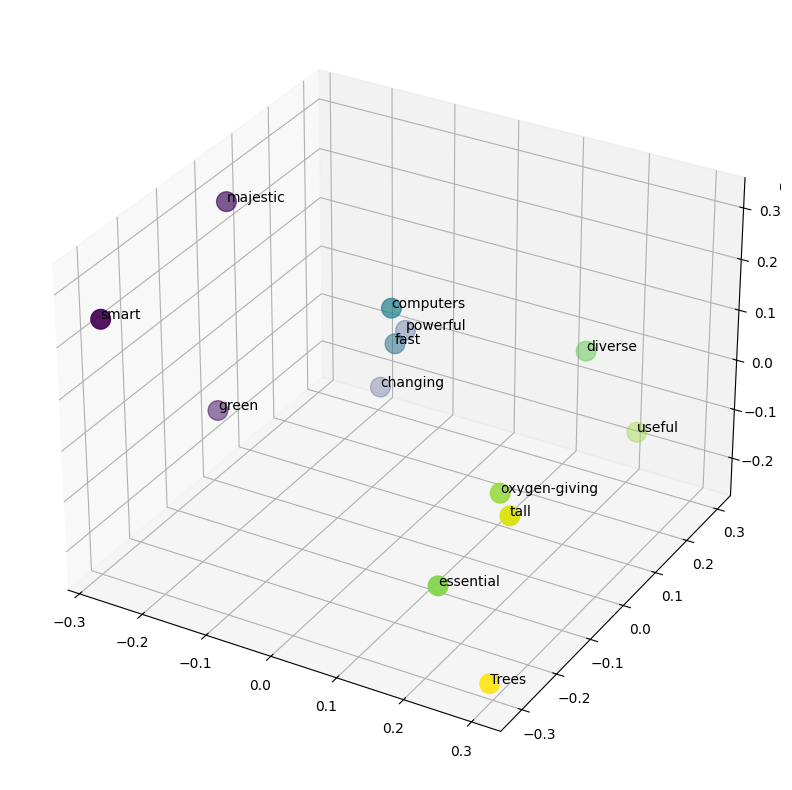

In [11]:
import matplotlib.pyplot as plt
# Visualize the word vectors in 3D space using PCA
vectors = model.wv.vectors


fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')

xdata = vectors[:, 0]
ydata = vectors[:, 1]
zdata = vectors[:, 2]
names=model.wv.index_to_key

ax.scatter3D(xdata, ydata, zdata, s=200 , c=xdata)
for names, x, y, z in zip(names, xdata, ydata, zdata):
    label = names
    ax.text(x, y, z, label )
plt.show()


# Word2Vec Example-2

In [12]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/giridhar276/Datasets/master/Amazon_Yelp_Reviews/Review_Data.csv", "Review_Data.csv")
data_file="Review_Data.csv"

In [13]:
def read_input(input_file):
    with open (input_file, 'rb') as f:
        for i, line in enumerate (f):
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)
            # read the tokenized reviews into a list
            # each review item becomes a series of words
            # so this becomes a list of lists
    print("File reading done !!")
documents = list (read_input (data_file))

File reading done !!


In [14]:
print(documents)

[['id', 'review', 'sentiment'], ['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter'], ['good', 'case', 'excellent', 'value'], ['great', 'for', 'the', 'jawbone'], ['tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', 'minutes', 'major', 'problems'], ['the', 'mic', 'is', 'great'], ['have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent', 'volume'], ['if', 'you', 'have', 'several', 'dozen', 'or', 'several', 'hundred', 'contacts', 'then', 'imagine', 'the', 'fun', 'of', 'sending', 'each', 'of', 'them', 'one', 'by', 'one'], ['if', 'you', 'are', 'razr', 'owner', 'you', 'must', 'have', 'this'], ['needless', 'to', 'say', 'wasted', 'my', 'money'], ['what', 'waste', 'of', 'money', 'and', 'time'], ['and', 'the', 'sound', 'quality', 'is', 'great'], ['he', 'was', 'very', 'impressed', 'when', 'going', 'from', 'the', 'original', 'battery', 'to',

In [15]:
from gensim.models import Word2Vec
model = Word2Vec(documents, min_count=1, vector_size=10)
#size： size of word vector, hidden layer
#min-count：discard words that appear less than # times
#window：Context Window size

In [16]:
# Print the vectors for a couple of words

for word, vector in zip(model.wv.index_to_key, model.wv.vectors):
  if word in ["good", "bad", "money"]:
    print(word, vector)

good [ 0.5188376  -0.39766952  0.7181252   0.05499454  0.22200361  0.38241318
  1.5248172   0.6733196  -1.2856808  -0.8390914 ]
bad [ 0.2802362  -0.19994225  0.4223255   0.11250482  0.15208673  0.10169001
  0.7091667   0.3896344  -0.6376915  -0.41410014]
money [ 0.16352564 -0.181988    0.41173178 -0.08727012  0.14914262  0.17609484
  0.5329635   0.36098975 -0.39378077 -0.40374908]


# Word2Vec Credit Reporting Casestudy


In [17]:
import pandas as pd
import numpy as np
import requests
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

## Step 1: Load the Dataset

In [18]:
!wget https://github.com/giridhar276/Datasets/raw/refs/heads/main/Bank_Customer_Complaints/complaints_v2.zip
!unzip -o complaints_v2.zip
complaints_data = pd.read_csv("/content/complaints_v2.csv")
complaints_data.head()

--2025-09-16 11:12:24--  https://github.com/giridhar276/Datasets/raw/refs/heads/main/Bank_Customer_Complaints/complaints_v2.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/giridhar276/Datasets/refs/heads/main/Bank_Customer_Complaints/complaints_v2.zip [following]
--2025-09-16 11:12:24--  https://raw.githubusercontent.com/giridhar276/Datasets/refs/heads/main/Bank_Customer_Complaints/complaints_v2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20228857 (19M) [application/zip]
Saving to: ‘complaints_v2.zip’

complaints_v2.zip   100%[===================>]  19.29M  --.-KB/s    in 0.09s   

2

,ID,product,text,label
0,0,credit_card,purchase order day shipping amount receive pro...,1
1,1,credit_card,forwarded message date tue subject please inve...,1
2,2,retail_banking,forwarded message cc sent friday pdt subject f...,1
3,3,credit_reporting,payment history missing credit report speciali...,0
4,4,credit_reporting,payment history missing credit report made mis...,0


## Step2: Pre-processing

In [19]:
#lets take a sample data for building the model quickly
data=complaints_data.sample(frac=0.5, random_state=42)
print("Shape", data.shape)
print(data['product'].value_counts())
#Convert all values into text
data['processed_text'] = data['text'].astype(str)

Shape (81210, 4)
product
credit_reporting       45632
debt_collection        11465
mortgages_and_loans     9475
credit_card             7788
retail_banking          6850
Name: count, dtype: int64


## Step 3: Prepare the Data for TensorFlow

In [20]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['processed_text'])
sequences = tokenizer.texts_to_sequences(data['processed_text'])

max_length = 100  # Maximum length of a complaint narrative
X = pad_sequences(sequences, maxlen=max_length)
y = data['product']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

## Step 4: Configure the model

In [21]:
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Step 5: Train the Model

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
445/445 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6119 - loss: 1.0706 - val_accuracy: 0.8069 - val_loss: 0.5561
Epoch 2/5
445/445 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8245 - loss: 0.5093 - val_accuracy: 0.8376 - val_loss: 0.4768
Epoch 3/5
445/445 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8515 - loss: 0.4337 - val_accuracy: 0.8442 - val_loss: 0.4490
Epoch 4/5
445/445 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8663 - loss: 0.3937 - val_accuracy: 0.8528 - val_loss: 0.4402
Epoch 5/5
445/445 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8764 - loss: 0.3625 - val_accuracy: 0.8549 - val_loss: 0.4360


In [23]:
#Save the model
model.save_weights('complaints_model.weights.h5')

#Load the saved model
model.load_weights('complaints_model.weights.h5')

## Step 6: Evaluate the Model

In [24]:
y_pred = np.argmax(model.predict(X_test), axis=1)

#Confusion Matrix
cm= tf.math.confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
tf.Tensor(
[[ 1792   244    56    44   218]
 [  303 12477   602   263    64]
 [   94   632  2576   117    33]
 [   80   299   107  2225    77]
 [  172    58    27    45  1758]], shape=(5, 5), dtype=int32)
Accuracy: 0.8549029265689776
Classification Report:
                     precision    recall  f1-score   support

        credit_card       0.73      0.76      0.75      2354
   credit_reporting       0.91      0.91      0.91     13709
    debt_collection       0.76      0.75      0.76      3452
mortgages_and_loans       0.83      0.80      0.81      2788
     retail_banking       0.82      0.85      0.84      2060

           accuracy                           0.85     24363
          macro avg       0.81      0.81      0.81     24363
       weighted avg       0.86      0.85      0.85     24363



In [25]:
#Making a prediction on new narration

new_complaints=[
    "payment history missing credit report made mistake put account forbearance without authorization ",
    ]

new_sequences = tokenizer.texts_to_sequences(new_complaints)
new_X = pad_sequences(new_sequences, maxlen=max_length)
new_predictions = model.predict(new_X)
pred_class=np.argmax(new_predictions, axis=1)
print(pred_class)
print("1- Credit Reporting; 2- Credit Card; 3- Debt Collection")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
[1]
1- Credit Reporting; 2- Credit Card; 3- Debt Collection
